In [1]:
# ! python -m numpy.f2py -c Montecarlo.f90 -m montecarlo
! python -m numpy.f2py -c Kirchoff_sub_rnt.f90 -m kirchhoff2

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "kirchhoff2" sources
f2py options: []
f2py:> /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/src.macosx-10.7-x86_64-3.7/kirchhoff2module.c
creating /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/src.macosx-10.7-x86_64-3.7
Reading fortran codes...
	Reading file 'Kirchoff_sub_rnt.f90' (format:free)
	Reading file '/opt/intel/compilers_and_libraries_2020.1.216/mac/mkl/include/mkl_dss.fi' (format:fix)
Post-processing...
	Block: kirchhoff2
			Block: kirchhoff
				Block: dss_factor
				Block: dss_factor_real
				Block: dss_factor_complex
				Block: dss_solve
				Block: dss_solve_real
				Block: dss_solve_complex
Post-processing (stage 2)...
Building modules...
	Building module "kirchhoff2"...
		Constructi

/usr/local/bin/gfortran -Wall -g -m64 -Wall -g -undefined dynamic_lookup -bundle /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/src.macosx-10.7-x86_64-3.7/kirchhoff2module.o /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/src.macosx-10.7-x86_64-3.7/fortranobject.o /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak/Kirchoff_sub_rnt.o -L/usr/local/gfortran/lib/gcc/x86_64-apple-darwin16/6.3.0 -L/usr/local/gfortran/lib/gcc/x86_64-apple-darwin16/6.3.0/../../.. -L/usr/local/gfortran/lib/gcc/x86_64-apple-darwin16/6.3.0/../../.. -lgfortran -o ./kirchhoff2.cpython-37m-darwin.so
Removing build directory /var/folders/q1/8h226kws6qj8hctylvlyybhh0000gn/T/tmpzxjcrzak


In [2]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math
import time
import montecarlo as mcmc
import kirchhoff2
from scipy import signal
from scipy import stats

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [4]:
mx = 40
my = 40
val = [1.0,0.0]
Rload = 1.0
volt = 0.01*(mx-1.)
gamma = 0.1
mtot = mx*my
sites = 0.6

In [5]:
pot = np.zeros(mtot+1)

# phi = np.random.choice(val,(mx,my),p= [0.8,0.2])
# phi2 = np.zeros(mx,my)
# print(phi)

# phi2 = np.random.choice(val,(mx,my),p= np.flip([0.8,0.2]))
# phi2 = np.absolute(phi - 1.)


phi1 = np.ones((mx,my))
phi2 = np.ones((mx,my))
dum = 313

# sites = 0.1
def gen_lat(A):
    for k in range(int(mtot*sites)):
#         np.random.seed(seed = dum)
        ii = np.random.randint(0,mx)
        jj = np.random.randint(0,my)
#         print(ii,jj)
        if A[ii,jj] != 0.0:
            A[ii,jj] = 0.0
#         dum = dum + (3*k)    
    return A

phi1 = gen_lat(phi1)
print()
phi2 = gen_lat(phi2)
phi2 = np.absolute(phi2 - 1.)
print()

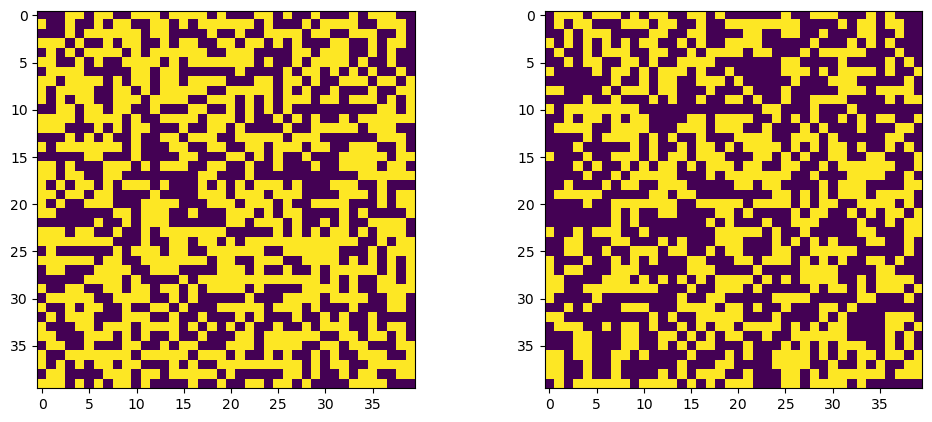

In [6]:
f = plt.figure(figsize=(12, 5)); # plot the calculated values  

sp =  f.add_subplot(1, 2, 1 );
plt.imshow(phi1)

sp =  f.add_subplot(1, 2, 2 );
plt.imshow(phi2)

plt.show()

In [7]:
# pot,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phi, Rload, volt, pot, mtot, mx, my)

In [8]:
# print(pot)
# resist

In [9]:
# plt.imshow(resist)
# plt.show()

In [10]:
# resistance = (volt - pot[mtot])/(pot[mtot]/Rload)
# print(resistance)

In [11]:
r1 = []
r2 = []
# mx = 20
# my = 20
prob = [0.8,0.2]
phi1 = np.ones((mx,my))
phi2 = np.ones((mx,my))
# sites = 0.1
dum=38285
for k in range(10000):
#     dum = dum + 7*k
#     np.random.seed(dum)
    phi1 = np.ones((mx,my))
    phi1 = gen_lat(phi1)
    pot1 = np.zeros(mtot+1)
    pot1,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phi1, Rload, volt, mtot, mx, my)
    r1.append((volt - pot1[mtot])/(pot1[mtot]/Rload))
    phi2 = np.ones((mx,my))
    phi2 = gen_lat(phi2)
    phi2 = np.absolute(phi2 - 1.)
    pot2 = np.zeros(mtot+1)
    pot2,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phi2, Rload, volt, mtot, mx, my)
    r2.append((volt - pot2[mtot])/(pot2[mtot]/Rload))

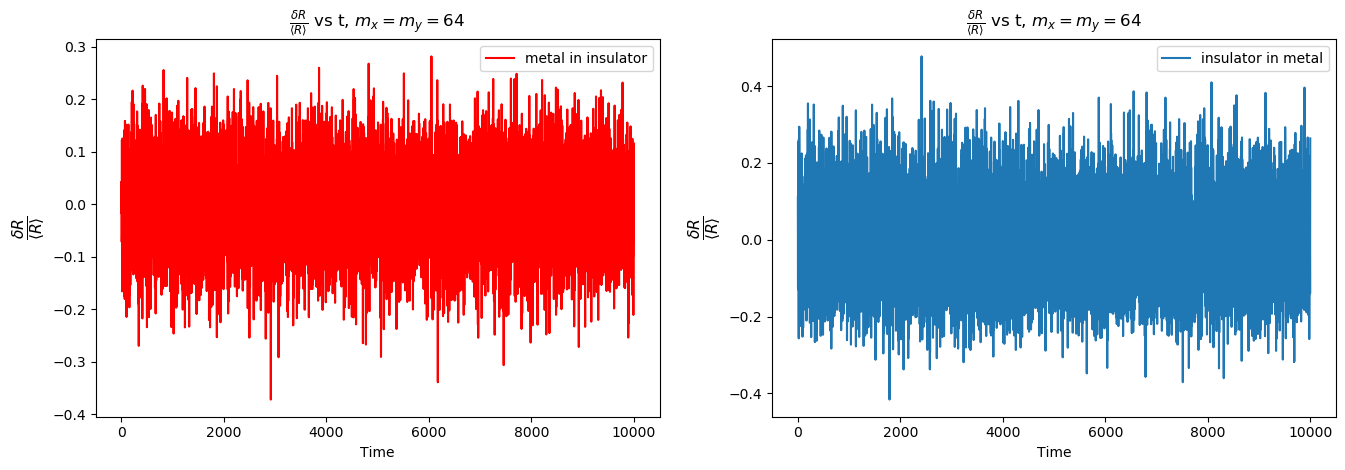

In [12]:
# print(r1)

f = plt.figure(figsize=(16, 5)); # plot the calculated values  

sp =  f.add_subplot(1, 2, 1 );
r1 = np.array(r1)
dr1 = r1 - np.mean(r1)
plt.plot(dr1/np.mean(r1), label = "metal in insulator", color = 'red')
plt.xlabel("Time")
plt.ylabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
# plt.ylim(-0.1,0.1)
plt.legend()
plt.title(r'$\frac{\delta R}{\langle R \rangle}$ vs t, $m_x = m_y = 64$ ')    
    

sp =  f.add_subplot(1, 2, 2 );
r2 = np.array(r2)
dr2 = r2 - np.mean(r2)
plt.plot(dr2/np.mean(r2), label = "insulator in metal")
plt.xlabel("Time")
plt.ylabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
# plt.ylim(-0.1,0.1)
plt.legend()
plt.title(r'$\frac{\delta R}{\langle R \rangle}$ vs t, $m_x = m_y = 64$ ')
# # plt.savefig(path+"Rvt.pdf")

plt.show()

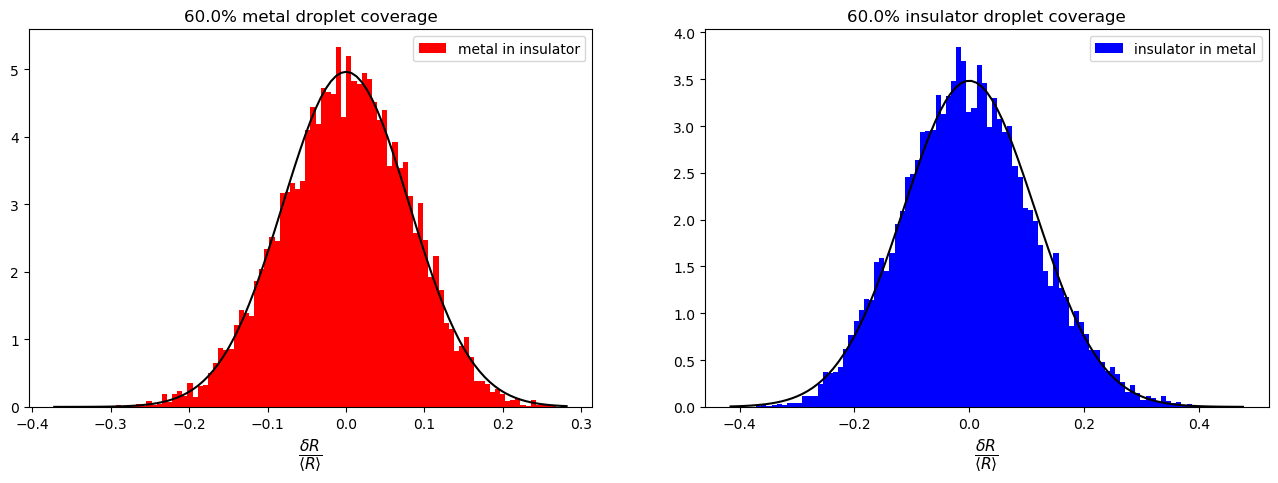

In [13]:
# plt.hist(r1,bins=100, color = 'red')

# print(r1)

f = plt.figure(figsize=(16, 5)); # plot the calculated values  

sp =  f.add_subplot(1, 2, 1 );
# _, bins1, _ = plt.hist(r1,bins=100, color = 'red', label = 'metal in insulator')
_, bins1, _ = plt.hist(dr1/np.mean(r1),bins=100, density=True, color = 'red', label = 'metal in insulator')
mu1, sigma1 = stats.norm.fit(dr1/np.mean(r1))
best_fit_line1 = stats.norm.pdf(bins1, mu1, sigma1)
# print(best_fit_line)
plt.plot(bins1, best_fit_line1, color = 'black')
# plt.xlabel("Time")
plt.xlabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
# plt.xlim(-0.08,0.08)
plt.legend()
plt.title(format(sites*100)+'% metal droplet coverage')
# plt.title(r'$\frac{\delta R}{\langle R \rangle}$ vs t, $m_x = m_y = 64$ ')    
    

sp =  f.add_subplot(1, 2, 2 );
# _, bins2, _ = plt.hist(r2,bins=100, color = 'blue', label = 'insulator in metal')
_, bins2, _ = plt.hist(dr2/np.mean(r2),bins=100, density=True, color = 'blue', label = 'insulator in metal')
mu2, sigma2 = stats.norm.fit(dr2/np.mean(r2))
best_fit_line2 = stats.norm.pdf(bins2, mu2, sigma2)
plt.plot(bins2, best_fit_line2, color = 'black')
# plt.xlabel("Time")
plt.xlabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
# plt.xlim(-0.08,0.08)
plt.legend()
# plt.title(r'$\frac{\delta R}{\langle R \rangle}$ vs t, $m_x = m_y = 64$ ')    


plt.title(format(sites*100)+'% insulator droplet coverage')
# plt.savefig("dist_0.1.pdf")

plt.show()

In [14]:
print(np.max(best_fit_line1), np.max(best_fit_line2))
print("Mean :",mu1, mu2)
print("Sigma :", sigma1, sigma2)

4.964956862042085 3.4822715928546324
Mean : 2.55218068900831e-16 1.2922996006636821e-16
Sigma : 0.0803510650280243 0.11450005027667065


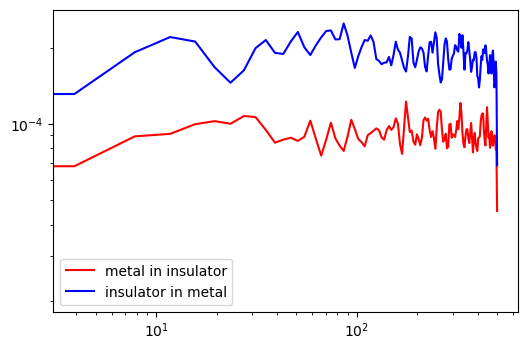

In [15]:
fs = 1000.

beta = 10.0
window_length = 256
numoverlap = window_length/2.
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
f1, R_ps1 = np.absolute(signal.welch(dr1/np.mean(r1), fs, nperseg = window_length, 
                                     window=kaiserw, noverlap = numoverlap, scaling = 'spectrum'))
f2, R_ps2 = np.absolute(signal.welch(dr2/np.mean(r2), fs, nperseg = window_length, 
                                     window=kaiserw, noverlap = numoverlap, scaling = 'spectrum'))

plt.loglog(f1, R_ps1,label = "metal in insulator", color = 'red')
plt.loglog(f2, R_ps2,label = "insulator in metal", color = 'blue')
plt.legend()
plt.show()

In [16]:
# Eb = 0.0
# T = np.arange(0.1,1.1,0.1)
# print(T)
# mx,my = 20,20
# mtot = mx*my
# phi = np.random.choice(val,(mx,my),p= prob)
# r = []
# pot = np.zeros(mtot+1)
# pot,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phi, Rload, volt, pot, mtot, mx, my)

# VV1 = np.reshape(pot[0:mtot],(mx,my)) 
# for t in T:
#     for jj in range(5000):
#         i = np.random.randint(0,mx)
#         j = np.random.randint(0,my)
#         ran = np.random.random()
#         pot = pot*0.0
#         phit = phi
#         phit[i,j] = np.absolute(phi[i,j] - 1.)
# #         pot2 = np.zeros(mtot+1)
#         pot2,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phit, Rload, volt, pot, mtot, mx, my)
        
#         VV2 = np.reshape(pot2[0:mtot],(mx,my)) 
#         if ran < np.exp(-(VV1[i,j] - VV2[i,j])/t):
#             phi[i,j] = phit[i,j]
#         if jj >= 500:    
#             pot,iext,resist,gmat = kirchhoff2.kirchhoff(gamma, phi, Rload, volt, pot, mtot, mx, my)
#             r.append((volt - pot[mtot])/(pot[mtot]/Rload))
    




In [17]:
# r = np.array(r)
# r = np.reshape(r,(10,4500))
# R0 = np.mean(r,axis=1)
# R0 = np.reshape(R0,(10,1))
# print(np.shape(R0), R0)
# R0 = np.dot(R0,np.ones((1,4500)))
# print(np.shape(R0))
# dr = (r - R0)/R0

    

In [18]:
# for k in range(10):
#     plt.plot(dr[k,:], label = "T = " + format(T[k], '.2f') )
# #     plt.plot(r[k,:], label = "T = " + format(T[k], '.2f') )

# plt.legend()
# plt.show()

In [25]:


sigma_mi = np.array([0.00768, 0.0152, 0.026,0.039,0.0579,0.08])
sigma_im = np.array([0.0126,0.0322,0.0602,0.0921,0.117,0.115])
coverage = np.array([10.,20.,30.,40.,50.,60.])

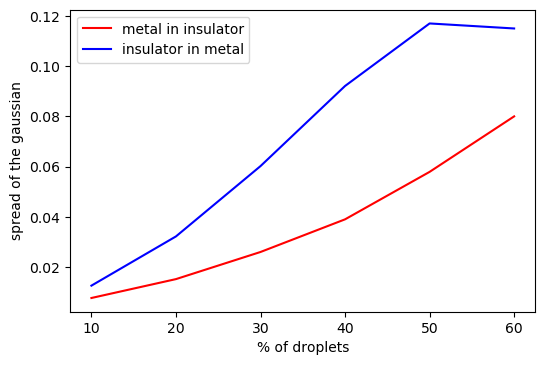

In [26]:
plt.plot(coverage,sigma_mi, label = "metal in insulator", color = 'red')
plt.plot(coverage, sigma_im, label = "insulator in metal", color = 'blue')
# plt.plot(coverage,sigma_mi/sigma_im, label = "ratio" )
plt.legend()
plt.xlabel("% of droplets")
plt.ylabel("spread of the gaussian")
plt.show()

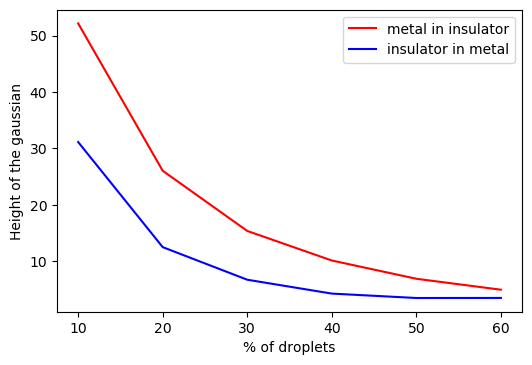

In [22]:
Hm = np.array([52.17,26.04,15.37,10.13,6.89,4.95])
Hi = np.array([31.14,12.5,6.72,4.26,3.48,3.49])
cover = np.array([10.,20.,30.,40.,50.,60.])


plt.plot(cover,Hm, label = "metal in insulator", color = 'red')
plt.plot(cover, Hi, label = "insulator in metal", color = 'blue')
# plt.plot(coverage,sigma_mi/sigma_im, label = "ratio" )
plt.legend()
plt.xlabel("% of droplets")
plt.ylabel("Height of the gaussian")
plt.show()